In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

In [2]:
df = pd.read_csv("student_scores - student_scores.csv")
print(df.shape)
df.head()

(25, 2)


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [3]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000027C9E5F2EC8>,
      dtype=object)

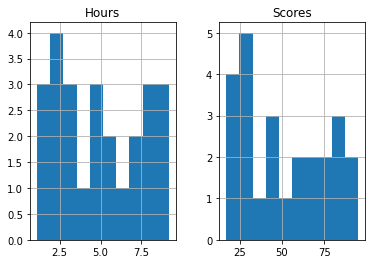

In [4]:
df.hist()

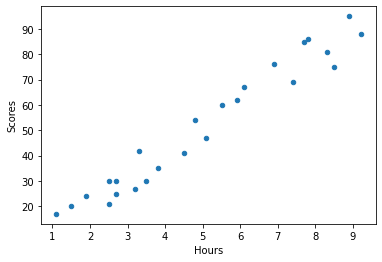

In [5]:
df.plot(kind="scatter",x="Hours",y="Scores")

In [6]:
msk = np.random.rand(len(df)) < 0.75
train = df[msk]
test = df[~msk]

In [7]:
print(train.shape)
print(test.shape)
print(train.head())
print(test.head())

(16, 2)
(9, 2)
   Hours  Scores
0    2.5      21
1    5.1      47
3    8.5      75
4    3.5      30
9    2.7      25
   Hours  Scores
2    3.2      27
5    1.5      20
6    9.2      88
7    5.5      60
8    8.3      81


In [8]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

In [9]:
train_x = np.asanyarray(train[['Hours']])
train_y = np.asanyarray(train[['Scores']])
reg.fit (train_x, train_y)
# The coefficients
print ('Coefficients: ', reg.coef_)
print ('Intercept: ',reg.intercept_)

Coefficients:  [[10.30077297]]
Intercept:  [-0.30415472]


Text(0, 0.5, 'Marks Scored')

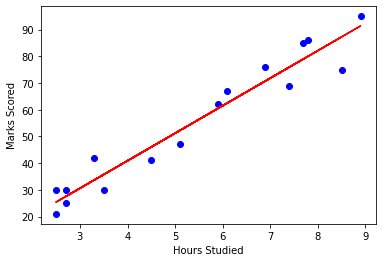

In [10]:
plt.scatter(train.Hours, train.Scores,  color='blue')
plt.plot(train_x, reg.coef_[0][0]*train_x + reg.intercept_[0], '-r')
plt.xlabel("Hours Studied")
plt.ylabel("Marks Scored")

In [11]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['Hours']])
test_y = np.asanyarray(test[['Scores']])
test_y_ = reg.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y_ , test_y) )

Mean absolute error: 4.91
Residual sum of squares (MSE): 24.96
R2-score: 0.97


In [15]:
#Question: What will be predicted score if a student study for 9.25 hrs in a day?

#Answer based on training on the train set with 17 entries:

pred1 = reg.predict([[9.5]])
print("If a student studies for 9.25 hours a day, percentage he'd score: %.2f " % pred1)

If a student studies for 9.25 hours a day, percentage he'd score: 97.55 


In [16]:
#Now I'll train on all the available data

Text(0, 0.5, 'Marks Scored')

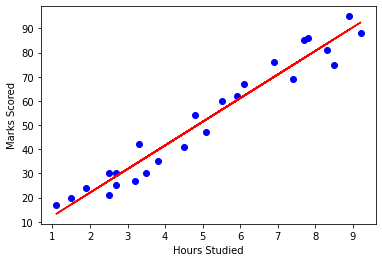

In [17]:
train_x1 = np.asanyarray(df[['Hours']])
train_y1 = np.asanyarray(df[['Scores']])
reg.fit(train_x1, train_y1)

plt.scatter(df.Hours, df.Scores,  color='blue')
plt.plot(train_x1, reg.coef_[0][0]*train_x1 + reg.intercept_[0], '-r')
plt.xlabel("Hours Studied")
plt.ylabel("Marks Scored")

In [18]:
#Question: What will be predicted score if a student study for 9.25 hrs in a day?

#Answer based on training on the whole 25 entries:

pred2 = reg.predict([[9.5]])
print("If a student studies for 9.25 hours a day, percentage he'd score: %.2f" % pred2)

If a student studies for 9.25 hours a day, percentage he'd score: 95.35
